# Inexact Move Function

Let's see how we can incorporate **uncertain** motion into our motion update. We include the `sense` function that you've seen, which updates an initial distribution based on whether a robot senses a grid color: red or green. 

Next, you're tasked with modifying the `move` function so that it incorporates uncertainty in motion.

<img src='images/uncertain_motion.png' width=50% height=50% />


First let's include our usual resource imports and display function.

In [9]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [10]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')


You are given the initial variables and the complete `sense` function, below.

In [11]:
# given initial variables
p=[0, 1, 0, 0, 0]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

# You are given the complete sense function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    q=[]
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
        
    # sum up all the components
    s = sum(q)
    # divide all elements of q by the sum to normalize
    for i in range(len(p)):
        q[i] = q[i] / s
    return q

# Commented out code for measurements
# for k in range(len(measurements)):
#     p = sense(p, measurements)


### QUIZ: Modify the move function to accommodate the added probabilities of overshooting or undershooting the intended destination.

This function should shift a distribution with the motion, U, with some probability of under/overshooting. For the given, initial `p`, you should see the result for U = 1 and incorporated uncertainties: `[0.0, 0.1, 0.8, 0.1, 0.0]`.

4 3 0
0 0 0
s exact 0.0
0.0
0 4 1
0 0 0
s exact 0.0
0.0
1 0 2
0 0 1
s exact 0.0
0.1
2 1 3
1 0 0
s exact 0.7
0.7
3 2 4
0 1 0
s exact 0.0
0.2
[0.0, 0.0, 0.1, 0.7, 0.2]


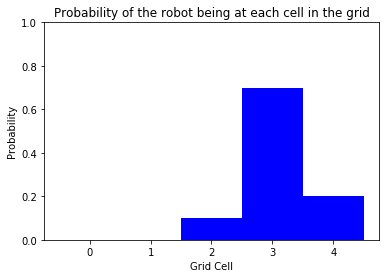

In [26]:
## TODO: Modify the move function to accommodate the added robabilities of overshooting or undershooting 
pExact = 0.7
pOvershoot = 0.2
pUndershoot = 0.1

# Complete the move function
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        ## TODO: Modify this distribution code to incorporate values 
        ## for over/undershooting the exact location
        
        # use the modulo operator to find the new location for a p value
        index = (i-U) % len(p)
        nextIndex = (i-U-1) % len(p)
        prevIndex = (i-U+1) % len(p)
        s = pExact * p[index]
        s = s + pOvershoot  * p[nextIndex]
        s = s + pUndershoot * p[prevIndex]  
        print(s)
        # append the correct, modified value of p to q
        q.append(s)
    return q

## TODO: try this for U = 2 and see the result
p=[0, 0, 1, 0, 0]
p = move(p,1)
print(p)
display_map(p)